# Assignment 6: Restaurant Data Analysis

In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Creating Sample Dataset

In [6]:

data = {
    'restaurant_name': ['Foodies', 'Spice Hub', 'Tandoori Tales', 'Burger Point', 'Foodies',
                        'Spice Hub', 'Burger Point', 'Foodies', 'Tandoori Tales', 'Foodies',
                        'Urban Bites', 'Spice Hub', 'Foodies', 'Biryani Bowl', 'Urban Bites'],
    'location': ['Delhi', 'Delhi', 'Mumbai', 'Delhi', 'Bangalore',
                 'Mumbai', 'Bangalore', 'Mumbai', 'Delhi', 'Hyderabad',
                 'Hyderabad', 'Bangalore', 'Mumbai', 'Delhi', 'Mumbai'],
    'votes': [150, 85, 200, 120, 75, 90, 60, 130, 110, 145,
              95, 105, 165, 50, 75],
    'aggregate_rating': [4.1, 3.9, 4.3, 4.0, 4.2, 4.4, 3.8, 4.5, 4.0, 4.1,
                         4.3, 4.0, 4.6, 4.3, 4.2],
    'cuisines': ['North Indian', 'South Indian', 'Mughlai', 'Fast Food', 'North Indian',
                 'South Indian', 'Fast Food', 'Chinese', 'Mughlai', 'Chinese',
                 'Continental', 'Indian', 'Thai', 'Biryani', 'Italian'],
    'cost_for_two': [500, 600, 700, 400, 550, 620, 450, 510, 680, 490,
                     800, 620, 540, 460, 630]
}
df = pd.DataFrame(data)
df.head()


,restaurant_name,location,votes,aggregate_rating,cuisines,cost_for_two
0,Foodies,Delhi,150,4.1,North Indian,500
1,Spice Hub,Delhi,85,3.9,South Indian,600
2,Tandoori Tales,Mumbai,200,4.3,Mughlai,700
3,Burger Point,Delhi,120,4.0,Fast Food,400
4,Foodies,Bangalore,75,4.2,North Indian,550


## Basic Level - Questions 2 to 5

Unique restaurant count: 6
Top 10 restaurant names: restaurant_name
Foodies           5
Spice Hub         3
Tandoori Tales    2
Burger Point      2
Urban Bites       2
Biryani Bowl      1
Name: count, dtype: int64
Restaurants with rating > 4.0: 10


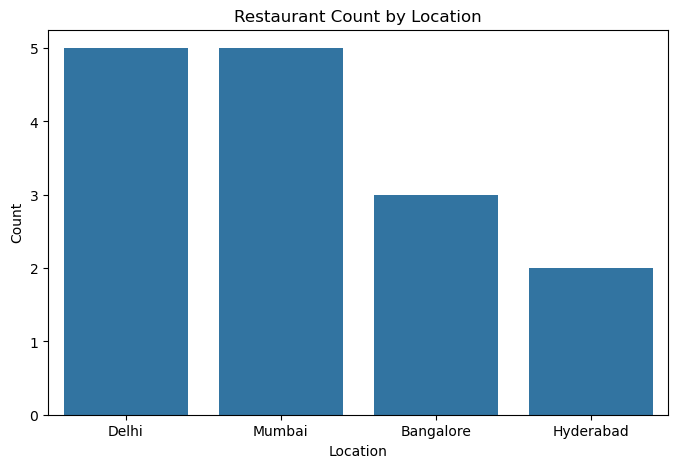

In [8]:

# 2. Unique restaurants
print("Unique restaurant count:", df['restaurant_name'].nunique())

# 3. Top 10 most frequent restaurant names
print("Top 10 restaurant names:", df['restaurant_name'].value_counts().head(10))

# 4. Restaurants with rating > 4.0
print("Restaurants with rating > 4.0:", len(df[df['aggregate_rating'] > 4.0]))

# 5. Count of restaurants by location
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='location', order=df['location'].value_counts().index)
plt.title('Restaurant Count by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


## Intermediate Level - Questions 6 to 10

Chains: restaurant_name
Foodies    5
Name: count, dtype: int64
restaurant_name
Foodies    4.3
Name: aggregate_rating, dtype: float64
restaurant_name
Foodies    665
Name: votes, dtype: int64


C:\Users\risha\AppData\Local\Temp\ipykernel_12644\3927780436.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_rating, x='restaurant_name', y='aggregate_rating', palette='viridis')


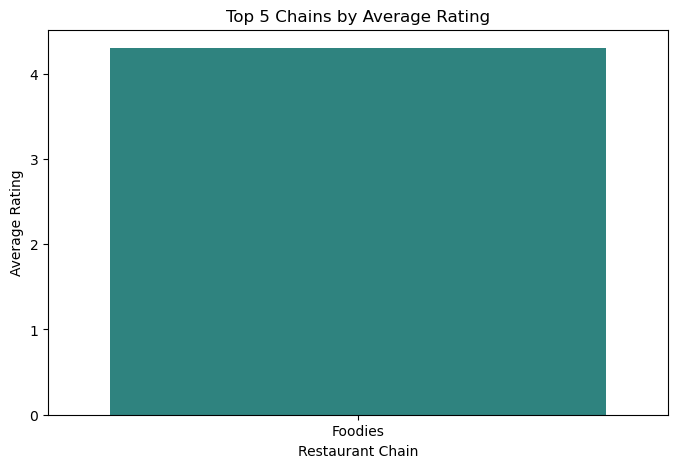

In [9]:

# 6. Identify restaurant chains (names > 3 times)
chains = df['restaurant_name'].value_counts()
chains = chains[chains > 3]
print("Chains:", chains)

# 7. New DataFrame for chain restaurants
      
chain_restaurants = df[df['restaurant_name'].isin(chains.index)]

# 8. Average rating per chain
print(chain_restaurants.groupby('restaurant_name')['aggregate_rating'].mean())

# 9. Total votes per chain
print(chain_restaurants.groupby('restaurant_name')['votes'].sum())

# 10. Top 5 chains by rating
avg_rating_chain = chain_restaurants.groupby('restaurant_name')['aggregate_rating'].mean()
top5_rating = avg_rating_chain.sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=top5_rating, x='restaurant_name', y='aggregate_rating', palette='viridis')
plt.title('Top 5 Chains by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Restaurant Chain')
plt.show()


## Advanced Level - Questions 11 to 15

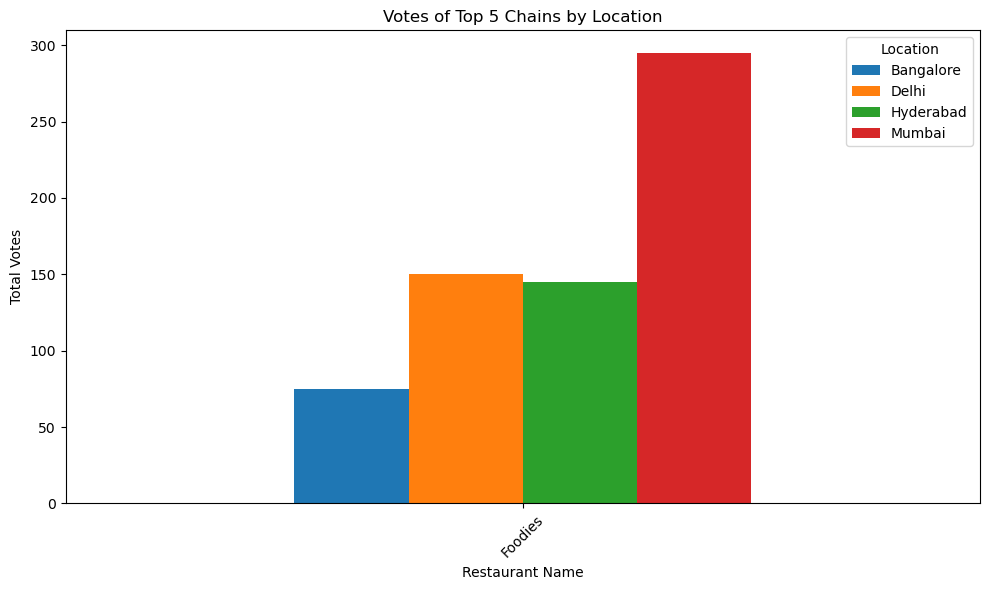

C:\Users\risha\AppData\Local\Temp\ipykernel_12644\3786712578.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=votes_by_loc, x='restaurant_name', y='aggregate_rating', palette='Set3')


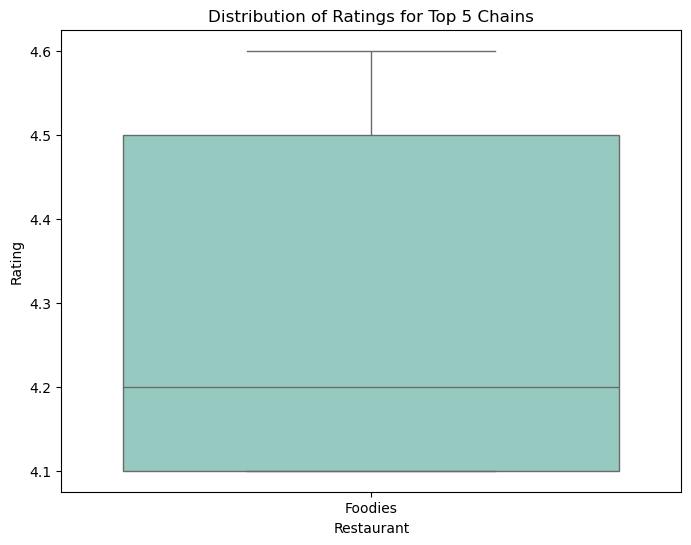

location
Mumbai    2
Name: count, dtype: int64
restaurant_name
Foodies    518.0
Name: cost_for_two, dtype: float64
                 Number_of_outlets  Average_rating  Total_votes  \
restaurant_name                                                   
Foodies                          5             4.3          665   

                 Average_cost_for_two  
restaurant_name                        
Foodies                         518.0  


In [11]:

# Q11: Votes of top 5 chains across locations
top5_names = top5_rating['restaurant_name']
votes_by_loc = chain_restaurants[chain_restaurants['restaurant_name'].isin(top5_names)]
votes_loc_grouped = votes_by_loc.groupby(['restaurant_name', 'location'])['votes'].sum().unstack(fill_value=0)

votes_loc_grouped.plot(kind='bar', figsize=(10,6))
plt.title("Votes of Top 5 Chains by Location")
plt.ylabel("Total Votes")
plt.xlabel("Restaurant Name")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()


# 12. Boxplot showing distribution of ratings for top 5 chains
plt.figure(figsize=(8,6))
sns.boxplot(data=votes_by_loc, x='restaurant_name', y='aggregate_rating', palette='Set3')
plt.title('Distribution of Ratings for Top 5 Chains')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.show()

# 13. Locations with highest number of high-rated chains (rating > 4.2)
high_rated_chains = votes_by_loc[votes_by_loc['aggregate_rating'] > 4.2]
print(high_rated_chains['location'].value_counts())

# 14. Average cost for two per chain
avg_cost_chain = chain_restaurants.groupby('restaurant_name')['cost_for_two'].mean().sort_values(ascending=False)
print(avg_cost_chain)

# 15. Final Summary Table
summary = chain_restaurants.groupby('restaurant_name').agg(
    Number_of_outlets=('restaurant_name', 'count'),
    Average_rating=('aggregate_rating', 'mean'),
    Total_votes=('votes', 'sum'),
    Average_cost_for_two=('cost_for_two', 'mean')
).sort_values(by='Average_rating', ascending=False).head(5)
print(summary)
